In [1]:
import pandas as pd
import numpy as np
from sklearn import *

In [2]:
df = pd.read_csv("/data/credit-default.csv")

In [3]:
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checking_balance        1000 non-null object
months_loan_duration    1000 non-null int64
credit_history          1000 non-null object
purpose                 1000 non-null object
amount                  1000 non-null int64
savings_balance         1000 non-null object
employment_length       1000 non-null object
installment_rate        1000 non-null int64
personal_status         1000 non-null object
other_debtors           1000 non-null object
residence_history       1000 non-null int64
property                1000 non-null object
age                     1000 non-null int64
installment_plan        1000 non-null object
housing                 1000 non-null object
existing_credits        1000 non-null int64
default                 1000 non-null int64
dependents              1000 non-null int64
telephone               1000 non-null object
foreign_worker          1000 non-null object
jo

In [6]:
df.default.value_counts()

1    700
2    300
Name: default, dtype: int64

In [9]:
target = "default"

label_encoder = preprocessing.LabelEncoder()


y = label_encoder.fit_transform(df[target])
X = df.drop(columns=target)
X = pd.get_dummies(X, drop_first=True)


features = X.columns

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size = 0.3, random_state = 1)


pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LogisticRegression())
])

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train) # calculates the estimated value
y_test_pred = pipe.predict(X_test)

est = pipe.steps[-1][-1]

#params = pd.DataFrame({"feature": features, "coefficient": est.coef_})
#params.iloc[params.coefficient.abs().sort_values(ascending = False).index]

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [11]:
y_test_pred

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [15]:
print("confusion matrix\n", metrics.confusion_matrix(y_test, y_test_pred))
print("accuracy", metrics.accuracy_score(y_test, y_test_pred))
print("precision", metrics.precision_score(y_test, y_test_pred))
print("recall", metrics.recall_score(y_test, y_test_pred))

confusion matrix
 [[188  26]
 [ 47  39]]
accuracy 0.7566666666666667
precision 0.6
recall 0.45348837209302323


In [23]:
y_test_prob = pipe.predict_proba(X_test)[:, 1]
y_test_prob.shape

(300,)

In [27]:
y_test_pred = np.where(y_test_prob>0.5, 1, 0)
print("confusion matrix\n", metrics.confusion_matrix(y_test, y_test_pred))
print("accuracy", metrics.accuracy_score(y_test, y_test_pred))
print("precision", metrics.precision_score(y_test, y_test_pred))
print("recall", metrics.recall_score(y_test, y_test_pred))

confusion matrix
 [[188  26]
 [ 47  39]]
accuracy 0.7566666666666667
precision 0.6
recall 0.45348837209302323


In [28]:
y_test_pred = np.where(y_test_prob>0.2, 1, 0)
print("confusion matrix\n", metrics.confusion_matrix(y_test, y_test_pred))
print("accuracy", metrics.accuracy_score(y_test, y_test_pred))
print("precision", metrics.precision_score(y_test, y_test_pred))
print("recall", metrics.recall_score(y_test, y_test_pred))

confusion matrix
 [[129  85]
 [ 21  65]]
accuracy 0.6466666666666666
precision 0.43333333333333335
recall 0.7558139534883721


In [29]:
y_test_pred = np.where(y_test_prob>0.8, 1, 0)
print("confusion matrix\n", metrics.confusion_matrix(y_test, y_test_pred))
print("accuracy", metrics.accuracy_score(y_test, y_test_pred))
print("precision", metrics.precision_score(y_test, y_test_pred))
print("recall", metrics.recall_score(y_test, y_test_pred))

confusion matrix
 [[209   5]
 [ 71  15]]
accuracy 0.7466666666666667
precision 0.75
recall 0.1744186046511628


In [30]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_test_prob)

In [31]:
import matplotlib.pyplot as plt

%matplotlib inline

Text(0.5, 1.0, 'ROC curve: 0.758476418169963')

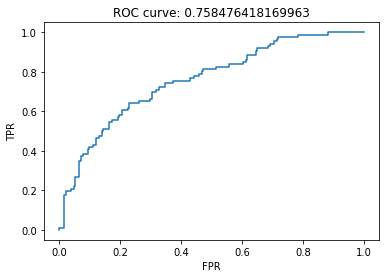

In [34]:
auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve: {}".format(auc))

In [39]:
target = "default"

label_encoder = preprocessing.LabelEncoder()


y = label_encoder.fit_transform(df[target])
X = df.drop(columns=target)
X = pd.get_dummies(X, drop_first=True)


features = X.columns

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size = 0.3, random_state = 1)


pipe = pipeline.Pipeline([
    #("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    #("scaler", preprocessing.StandardScaler()),
    ("est", tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=10))
])

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train) # calculates the estimated value
y_test_pred = pipe.predict(X_test)

est = pipe.steps[-1][-1]

#params = pd.DataFrame({"feature": features, "coefficient": est.coef_})
#params.iloc[params.coefficient.abs().sort_values(ascending = False).index]

print("confusion matrix\n", metrics.confusion_matrix(y_test, y_test_pred))
print("accuracy", metrics.accuracy_score(y_test, y_test_pred))
print("precision", metrics.precision_score(y_test, y_test_pred))
print("recall", metrics.recall_score(y_test, y_test_pred))

confusion matrix
 [[193  21]
 [ 57  29]]
accuracy 0.74
precision 0.58
recall 0.3372093023255814


In [40]:
from sklearn.tree import export_graphviz
export_graphviz(est, out_file = "tree.dot", feature_names = X.columns, filled=True)
!dot -Tpng tree.dot -o tree.png


In [41]:
est

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [49]:
importance = pd.DataFrame({"feature": features, "importance":  est.feature_importances_})
importance.sort_values("importance", ascending = False)

,feature,importance
9,checking_balance_unknown,0.533473
0,months_loan_duration,0.183929
24,savings_balance_< 100 DM,0.086350
11,credit_history_fully repaid,0.085644
39,installment_plan_none,0.060633
35,other_debtors_none,0.027046
27,employment_length_1 - 4 yrs,0.022925
36,property_other,0.000000
28,employment_length_4 - 7 yrs,0.000000
29,employment_length_> 7 yrs,0.000000


In [50]:
target = "default"

label_encoder = preprocessing.LabelEncoder()


y = label_encoder.fit_transform(df[target])
X = df.drop(columns=target)
X = pd.get_dummies(X, drop_first=True)


features = X.columns

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size = 0.3, random_state = 1)


pipe = pipeline.Pipeline([
    #("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    #("scaler", preprocessing.StandardScaler()),
    ("est", ensemble.RandomForestClassifier(n_estimators=25, max_features=0.6
                                            , max_depth=3, min_samples_leaf=10))
])

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train) # calculates the estimated value
y_test_pred = pipe.predict(X_test)

est = pipe.steps[-1][-1]

#params = pd.DataFrame({"feature": features, "coefficient": est.coef_})
#params.iloc[params.coefficient.abs().sort_values(ascending = False).index]

print("confusion matrix\n", metrics.confusion_matrix(y_test, y_test_pred))
print("accuracy", metrics.accuracy_score(y_test, y_test_pred))
print("precision", metrics.precision_score(y_test, y_test_pred))
print("recall", metrics.recall_score(y_test, y_test_pred))

confusion matrix
 [[207   7]
 [ 65  21]]
accuracy 0.76
precision 0.75
recall 0.2441860465116279
